# Hands-on 02: Visualização de sinais no tempo (vendo e ouvindo um sinal)

# Objetivos
As metas desse tutorial são ajudar o usuário a:
- Fazer uma breve revisão de sinais e ondas;
- Fazer uma breve revisão de sinais de áudio;
- Praticar geração e plotagem de sinais de áudio no Python;
- Praticar abertura e plotagem de arquivos de áudio no Python.

## Sinais e Ondas

**Sinais** são funções de uma ou mais variáveis que fornecem informações sobre um  determinado  fenômeno (LATHI,  1998;  PROAKIS, 1996). Quanto ao tempo, um sinal pode ser contínuo ou discreto no tempo. Quanto a amplitude, um sinal pode ser analógico (contínuo em amplitude) ou quantizado (digital ou discreto em amplitude). Assim, em uma classificação bem precisa, temos:

- **Contínuo vs Discreto**: se refere a classificação de sinais quanto a continuidade ou não no tempo;
- **Analógico vs Digital**:  se refere a classificação de sinais quanto a continuidade ou não na amplitude;

A figura a seguir ilustra as 4 opções seguindo essa classificação.

![fig_sinais_lathi](../FIGS/HD_02_PYTHON/sinais_lathi.png)

(a) Analógico e contínuo no tempo; (b) Digital e contínuo no tempo; (c) Analógico e discreto no tempo; e (d) Digital e discreto no tempo.

Contudo, é muito comum fazemos referência a sinal digital como um sinal analógico que foi submetido ao processo de **amostragem** (discreto no tempo), **quantização** (discreto em amplitude) e **codificação** (representado em bits).

**Porque é importante representar matematicamente os sinais?**
> Qualquer fonte de informação precisa transformar o sinal físico em sinal elétrico antes de transmiti-lo;

> Representar matematicamente nos trará conhecimento de como aumentar a eficiência da transmissão da informação contida naquele sinal;

> Representar matematicamente nos trará conhecimento de padrões esperados (sinais para previsão e/ou diagnóstico).


Por sua vez, **Onda** é uma perturbação que se propaga no espaço ou em qualquer outro meio. Elas podem ser classificadas em relação à natureza (mecânicas ou eletromagnéticas) e à direção de propagação (transversal ou longitudinal).

Quanto a natureza, uma onda pode ser **Mecânica** (se propaga em meios materiais, e.g. ondas marítimas e ondas sonoras, e tem comportamento descrito pelas **Leis de Newton**) ou **Eletromagnética** (não precisa de um meio material para se propagar e é resultado da combinação de campo elétrico com o campo magnético, e.g., ondas a luz e ondas de transmissão de sinais, as quais são descritas pelas **equações de Maxwell**).

![fig_ondas-eletromagneticas](../FIGS/HD_02_PYTHON/ondas-eletromagneticas.jpg)

Quanto a direção de vibração, uma onda pode ser **Transversal** (quando as partículas do meio de propagação vibram perpendicularmente à direção de propagação da onda, e.g., a luz) e **Longitudinal** (quando as partículas do meio de propagação vibram na mesma direção em que a onda se propaga, e.g., ondas sonoras).

![fig_ondas5](../FIGS/HD_02_PYTHON/ondas5.jpg)

## Som e ondas sonoras

Fisicamente, uma onda sonora é uma onda senoidal (ou conjunto de ondas senoidais) com uma certa frequência que se propaga no ar. De maneira simplista, uma onda sonora (um tom) é descrita como:

$$ y(t)= A{\cdot}sen(\omega{\cdot}t)$$

sendo: 
- A = Amplitude 
- ω = 2 $\cdot$ π $\cdot$ _f_ = Frequência angular
- f = Frequência

Se essas ondas estiverem com a frequência na faixa de 20 Hz à 20 kHz, o ouvido humano pode ser capaz de vibrar à mesma proporção, captando essa informação e produzindo sensações neurais, às quais o ser humano dá o nome de **som**. Além disso, frequências superiores a 13 kHz começam a ser desagradáveis ao ouvido humano. 

Ondas sonoras são produzidas por equipamentos osciladores, em geral, caixas de som ligadas a equipamentos capazes de gerar o sinal de músicas, da voz humana ou outro tipo de som desejado.

### Nota musicais e altura do som
**Nota** é o termo empregado para designar o elemento mínimo de um som, formado por um único modo de vibração do ar. Cada nota corresponde uma duração, está associada a uma frequência em Hz e uma resposta ao impulso que caracteriza o produtor do som (trimbre). 

Embora a **altura de som** esteja intimamente relacionada com a frequência, é mais comum, em música, que se utilizem os nomes das **notas musicais**. Os nomes das notas são definidos de acordo com sua disposição dentro de uma escala musical. Na escala de **dó maior**, por exemplo, as notas correspondentes às alturas são: Dó, Ré, Mi, Fá, Sol, Lá e Si, após o que os nomes se repetem. 

A distância entre duas alturas é chamada de intervalo. Assim, as notas ou tons (Dó, Ré ,Mi, ...) são oscilações em uma determinada frequência. A tabela a seguir mostra as frequências (_f_) das notas musicais e sua relação com a nota dó em 512 Hz:

| Notas |   Frequências (Hz)         | Razão  |
| ------ |:-------------:|:-----:|
| Dó (C)    | 512 |  1 |
| Ré   (D) | 576      |    $^9/_8$ |
| Mi    (E) | 640      |     $^5/_4$ |
| Fá    (F) | 682.67      |     $^4/_3$ |
| Sol    (G)| 768      |     $^3/_2$ |
| Lá     (A)| 853.3      |    $^5/_3$|
| Si     (B)| 960      |   $^{15}/_8$ |
| Dó     (C)| 1024 |  2 |


Perceba que quando multiplicamos a frequência da nota Dó por 2, obtemos outra nota Dó, porém mais aguda. Isso significa que o Dó de frequência 1024Hz é uma harmônica do Dó de frequência 512Hz. 

# Instalação de player VLC e bibliotecas necessárias

Precisamos instalar o player VLC para dar suporte aos experimentos dessa prática. Assim, em um terminal, digite:

```bash
sudo apt-get update
```

```bash
sudo apt-get install vlc
```
Também iremos precisar da biblioteca SoundDevice. Abra um terminal e digite:
```bash
python3 -m pip install sounddevice
```
Para garantir, instale também via conda, com o seguinte comando:
```bash
conda install -c conda-forge python-sounddevice
```
Também será necessária a instalação do PortAudio para comunicação do código com a placa de áudio do computador. Em um terminal, digite:
```bash
sudo apt-get install libportaudio2
```
e

```bash
sudo apt-get install libasound-dev
```

### Outras bibliotecas de manipulação de sinais de áudio
#### playsound
https://realpython.com/playing-and-recording-sound-python/

#### Outras sugestões em:
https://stackoverflow.com/questions/260738/play-audio-with-python

#### PyAudio
Existe uma biblioteca própria para o processamento de áudio, com vários outros métodos, incluindo entrada e armazenamento de áudio via microfone. Esta não foi utilizada na prática para evitar funções complicadas desnecessárias para uma funcionalidade simples como a explorada. Confira mais sobre a PyAudio [aqui](https://people.csail.mit.edu/hubert/pyaudio/docs/).

# Prática 1: Geração, reprodução e plotagem de um tom de áudio

**Passo 1:** Abra esse jupyter notebook no VS code ou crie um novo script com o código a seguir e salve-o com o nome **handson2_1.py**

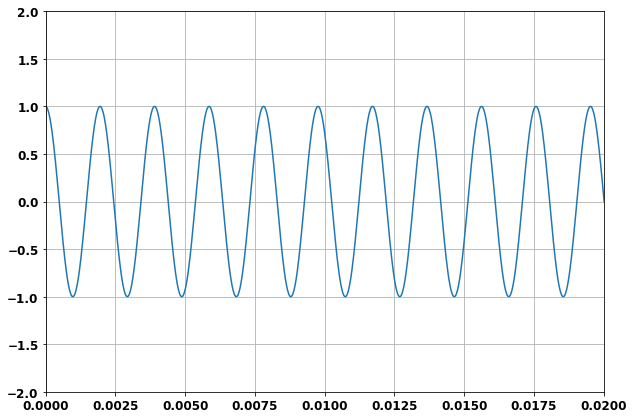

In [3]:
#importando as bibliotecas necessárias:
import numpy as np             
import matplotlib.pyplot as plt 
import scipy.io.wavfile as wv 
import os


# Parâmetros da onda:
tf = 1                         # Tempo de duração da nota
fc = 512                       # Frequência da nota Dó
fs = 100*fc                    # Frequencia de amostragem da nota. 
t =np.arange(0,tf+1/fs,1/fs)   # Vetor tempo. Para cada elemento do vetor t, haverá um elemento em y correspondente.
A = 1                          # Amplitude do sinal
y=A*np.cos(2*np.pi*fc*t)       # Sinal senoidal

plt.figure(1,figsize=[10,7])   # cria instância da figura para poder alterar seu tamanho
plt.plot(t,y, label='signal')  # Visualizar o sinal gerado  
plt.axis([0,0.02,-2,2])        # Zoom para melhor visualização
plt.grid(True)                 # Realiza a plotagem de uma grade para melhor vizualização e comparação
plt.show() 

### Bibliotecas usadas no código

No código acima foram utilizados 'apelidos' para referenciar as bibliotecas, e seus respectivos módulos, no intuito de deixar o código menos verboso.

```python
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io.wavfile as wv 
```
Sem essa prática, o código ficaria com a seguinte aparência:
```python
matplotlib.pyplot.plot(t,y)               
matplotlib.pyplot.axis([0,0.02,-2,2])     
matplotlib.pyplot.show()

som = scipy.io.wavfile.read('../MATERIAL/HD_02_PYTHON/sound_01.wav')
```
#### NumPy
Biblioteca para criação e manipulação de vetores. A função 'numpy.arange' permite a criação de um uma sequência em progressão aritmética. 
```python
t =np.arange(0,tf+1/fs,1/fs)
#parâmetro 1 : início
#parâmetro 2 : fim (embora ela termine a criação 1 passo antes do fim)
#parâmetro 3 : passo
```

#### Matplotlib
Biblioteca para visualização de dados, mais especificamente com o módulo interno Pyplot. A plotagem tem dois comandos essenciais e um opcional:
```python
plt.plot(t,y)   #eixo horizontal e vertical, nessa ordem
plt.axis([0,0.02,-2,2]) #opcional
#primeiro par de números: limites do eixo x
#segundo par de números: limites do eixo y

plt.show() #essencial para exibir a imagem
```


**Passo 3:** Visualize as variáveis criadas no menu _Variables_, ou Variáveis, do VS Code.

**Passo 4:** Clique com o botão direito do mouse sobre as variáveis e veja as opções de manipulação disponíveis.

**Passo 5:** Para obter outras informações sobre uma função utilizada, ou uma variável (objeto), use o console do IPython no canto inferior direito da tela (ou abra digitando **ipython** no terminal do vscode). Digite o nome do objeto ou função desejado ao lado de uma interrogação e tecle Enter. Por exemplo:
```
import numpy as np
np.cos?
```
Você receberá, dentro do próprio console, dados sobre a função 'numpy.cos'. É uma maneira rápida de acessar a documentação da função, análoga ao 'help' do Matlab.

**Passo 6:** Mude o argumento da senoide para gerar a nota Ré, susbtituindo a geração da onda sonora por:
```python
y=A*np.cos(2*(9/8)*np.pi*fc*t)
```
Para qualquer outra nota, podemos reproduzi-la apenas consultando a tabela de notas acima e substituindo a frequência da onda y.

**Exercício 01 (para o relatório):** tomando como referência a tabela contendo as frequências das notas musicais, gere as respectivas senóides e as plote num gráfico só, como na imagem seguir:

![fig_senoide](../FIGS/HD_02_PYTHON/senoide.jpg)


**Dica:** A plotagem de múltiplas linhas e suas respectivas legendas pode ser feita da seguinte maneira:

```python
import matplotlib.pyplot as plt

plt.plot(eixo_x,sinal_1)
plt.plot(eixo_x,sinal_2)
plt.plot(eixo_x,sinal_3)
#... até a n-ésima linha/sinal


#alternativamente, em um comando só:
plt.plot(eixo_x,sinal_1,eixo_x,sinal_2,eixo_x,sinal_3)

plt.legend(['legenda 1','legenda 2','legenda 3'])

```

**Passo 7:** Para consultar as variáveis do programa, clique em debugar a célula (fica ao lado do símbolo "play" da célula). O Visual Studio Code irá abrir uma janela em que serão mostradas as *Variáveis* (Globais e Locais), um módulo de *Inspeção* e a *Pilha de Chamadas*, que irá conter a célula que você está trabalhando. Você poderá trabalhar diretamente com os valores das variáveis. A imagem a seguir lida com as variáveis da célula python da prática 02:

![](../FIGS/HD_02_PYTHON/exemple_debug.png)

**Passo 8:** Caso ainda não tenha feito, crie um novo script com o código a seguir e salve-o com o nome **handson2_1.py**. Agora, faça a plotagem do histograma. Dessa vez, ao invés de usar o Explorador de variáveis, digite o seguinte comando no Debug Console enquanto a execução do código está parado em um breakpoint:
```ipython
plt.stem(t,y)
plt.axis([0,0.02,-2,2])
```

Você verá um tela similar a:

![fig_senoide](../FIGS/HD_02_PYTHON/plot_terminal.png)


**Passo 9:** Aprenda mais sobre o comando plt.show(). Para isso, segure o botão ``Ctrl`` e clique em cima da chamada da função. Você será direcionado à biblioteca da função

Quando quiser saber mais sobre uma função (Referência da função), método ou objeto sem abrir o navegador para procurar a identação, recorra ao ``Ctrl`` , como mostrado no comando acima.

**Passo 10:** Veja a lista de métodos possíveis de um objeto (variável) do seu código. Para isso, recorra ao Visual Studio Code. Após o nome da variável (já inicializada), adicione um ponto e o software irá mostrar diferentes tipos e possibilidades de chamadas. Por exemplo: digitando 'plt.', você verá todos os comandos possíveis da Pyplot listados.

![](../FIGS/HD_02_PYTHON/possibles.png)

**OBS.:** Caso você execute o script .py e as variáveis não atualizem, encerre o comando atual no Console IPython, clicando no botão quadrado vermelho que se encontra no canto superior direito do próprio console IPython.  

# Prática 2: Criação e reprodução de músicas baseadas em tons

Para criar/reproduzir músicas usando tons senoidais vamos apenas formar uma sequência de notas que será reproduzida em sequência temporal. Uma das formas se dá com a formação de um vetor para armazenar a sequência de notas que compõe a música, o qual será usado para gerar senos, que por sua vez, serão reproduzidos pela função  **sd.play(y,fs)** da biblioteca **sounddevice**.

**Passo 1:** Abra um arquivo python e crie um script chamado **handson2_2.py** com o seguinte código:

In [4]:
import numpy as np
import sounddevice as sd


# Duração de cada tom (em segundos).
time = 0.3

# Diconário de notas musicais (5ª oitava) - em frequência.
Do, Re, Mi, Fa, Sol, Silence = 528, 592, 665, 704, 790, 0

# Vetor de "música", usando o dicionário de notas pré-definido.
music = [Do, Re, Mi, Fa, Silence, Fa, Fa, Silence, Do, Re, Do, Re, Silence, Re,
           Re, Silence, Do, Sol, Fa, Mi, Silence, Mi, Mi, Silence, Do, Re, Mi, Fa,
           Silence, Fa, Fa]

for nota in music:
    if nota == Silence:
        sd.sleep(300)                                  # Caso a nota seja Silence para de tocar por 300 milisegundos
    else:
        fa = 100*nota                                  # Escolhe a frequência de amostragem do tom corrente.
        t = np.arange(0, time, 1/fa)                   # Gera o eixo do tempo para o tom corrente.
        y = np.cos(2 * np.pi * nota * t)               # Gera o tom corrente.
        sd.play(y, fa)                                 # Reproduzir o sinal gerado.
        sd.sleep(300)
        #sd.wait()                                      # bloquear o interpretador Python até que a reprodução termine.


No script acima, a música é determinada pelo vetor **music=[Do, Re, Mi, ..., Fa, Fa]**. Ele tem uma sequência de notas que compõem a música. As notas seguem um dicionário que estabelece um mapeamento de notas para números das frequências: _Do = 528; Ré = 592; Mi = 665; Fá = 704; Sol = 790; Silêncio = 0_. 

**Passo 2:** Crie um vetor música chamado **vtmusic** dado por **vtmusic = [1 2 3 0 0 5 0 5 0 3 0 4 0 0 4 0 1 2 3 0 5 0 5 0 4 0 3 0 0 1 1 2 3 0 5 0 0 5 4 3 1 0 4 0 0 3 3 2 2 0 3 0 0 2 2 1 1 ]** e utilize list comprehention para converter o vetor **vtmusic** em um vetor **music**. Neste caso, os inteiros 0, representem a frequência Silêncio, os inteiros 1, representem a frequência Dó, os inteiros 2, representem a frequência Ré, os inteiros 3, representem a frequência Mi e assim sucessivamente. Execute o programa novamente e verifique qual música será reproduzida.

**Passo 3:** Vamos alterar o trimbre de cada tom ao modificar a geração da onda senoidal. Para tal gere o script **handson2_3.py** com  o código a seguir:

In [5]:
import numpy as np
import sounddevice as sd


# Duração de cada tom (em segundos).
time = 0.3

# Diconário de notas musicais (5ª oitava) - em frequência.
Do, Re, Mi, Fa, Sol, Silence = 528, 592, 665, 704, 790, 0

# Vetor de "música", usando o dicionário de notas pré-definido.
music = [Do, Re, Mi, Fa, Silence, Fa, Fa, Silence, Do, Re, Do, Re, Silence, Re,
           Re, Silence, Do, Sol, Fa, Mi, Silence, Mi, Mi, Silence, Do, Re, Mi, Fa,
           Silence, Fa, Fa]

for nota in music:
    if nota == Silence:
        sd.sleep(300)                                                                                 # Caso a nota seja Silence para de tocar por 300 milisegundos
    else:                                               
        fa = 100*nota                                                                                 # Escolhe a frequência de amostragem do tom corrente.
        t = np.arange(0, time, 1/fa)                                                                  # Gera o eixo do tempo para o tom corrente.
        y = np.cos(2*np.pi*nota*t)+0.8*np.cos(2*np.pi*0.01*nota*t)+0.8*np.cos(-2*np.pi*0.01*nota*t)   # Gera o tom corrente.
        sd.play(y, fa)                                                                                # Reproduzir o sinal gerado.
        sd.sleep(300)
        #sd.wait()                                                                                     # bloquear o interpretador Python até que a reprodução termine.


Existem alguns trabalhos que modelam a resposta ao impulso de instrumentos musicais por meio de filtros digitais. Quem tiver interesse, pode ler os seguintes trabalhos.

* [GUSTAVO DE MELO VALEIRA, MODELAGEM E SIMULAÇÃO DE INSTRUMENTOS MUSICAIS UTILIZANDO FILTROS DIGITAIS ](../MATERIAL/HD_02_PYTHON/TGIGustavo.pdf);

* [Gustavo de Melo Valeira e Marcio Eisencraft, Modelagem e simulação de instrumentos musicais utilizando filtros digitais](../MATERIAL/HD_02_PYTHON/Valeira2007.pdf);

* [André Wagner França, Uso de Processamento Digital de Áudio na Implementação de Efeitos em Instrumentos Musicais](../MATERIAL/HD_02_PYTHON/2015_AndreWagnerFranca.pdf);

* [ADRIANO LUIZ MORETTI, PROTÓTIPO DE UM SOFTWARE PARA O RECONHECIMENTO DE NOTAS MUSICAIS](../MATERIAL/HD_02_PYTHON/2003-1adrianoluizmorettivf.pdf);

* [Universidade de Aveiro, Departamento de Eletrônica, Telecomunicações e Informática, PDS, Trabalho Prático No 1: Sintetizador de Música](../MATERIAL/HD_02_PYTHON/TrabPratico1.pdf);

* [Sophocles J. Orfanidis, Rutgers University, INTRODUCTION TO Signal Processing, Capítulo 8](../MATERIAL/HD_02_PYTHON/orfanidis-i2sp.pdf);

* [José Miguel Hobaica Alvarado, Ecualizador y Sintetizador Musical](../MATERIAL/HD_02_PYTHON/ecualizador-y-sintetizador-musical-4.pdf).

# Prática 3: Abrindo e reproduzindo arquivos de música

O Python tem biblioteca para abertura, manipulação e gravação de arquivos de áudio. Nesse experimento iremos praticar alguns deles. 

**Passo 1:** Abra o VS Code e crie um script chamado **handson3_1.py** com o seguinte código: 

**OBS.:** Mais uma vez, tenha atenção com o endereço da variável soundFile antes de executar o arquivo no VS.

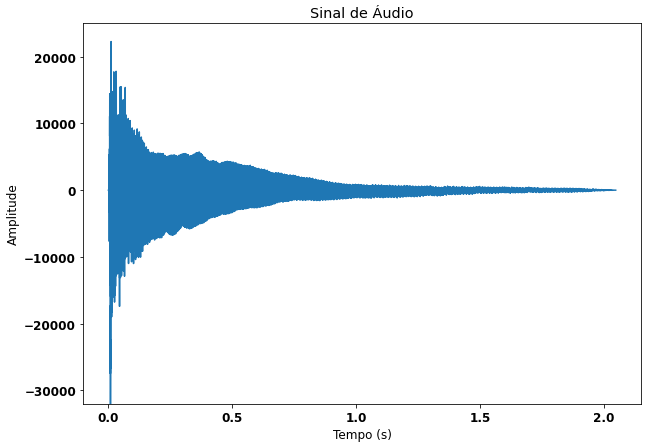

Amostragem:
 Taxa de amostragem =  44100  Hz
 Tempo entre amostras =  2.2675736961451248e-05  Segundos
 
Quantização e Codificação:
 
Informações gerais do arquivo de áudio:
 Número de amostras =  90309  amostras
 Número de canais =  (90309,)
 Duração =  2.0478231292517006  segundos


In [6]:
soundFile = '../MATERIAL/HD_02_PYTHON/sound_01.wav'               # Especifica do local e nome do arquivo de áudio

import numpy as np
import scipy.io.wavfile as wv 
import os
import matplotlib.pyplot as plt
import sounddevice as sd

dFa,vtSom = wv.read(soundFile)                                   # Abre arquivo de áudio de um arquivo
# vtSom: amplitude das amostras de som
# dFa: frequência de amostrasgem do som (amostragem no tempo)

dta = 1/dFa                                                      # Tempo entre amostras
dTFinal = (len(vtSom)-1)*dta                                     # Tempo da última amostra do sinal de áudio
vtTSom = np.arange(0,dTFinal+dta,dta)                            # Eixo temporal do arquivo de áudio
plt.figure(1,[10,7])
plt.plot(vtTSom,vtSom)                                           # Plota gráfico do áudio

font = {'family' : 'DejaVu Sans','weight' : 'bold','size': 12}   #Configura a fonte do título
plt.rc('font', **font)
plt.title('Sinal de Áudio')                                      # Configura título do gráfico
plt.ylabel('Amplitude')                                          # Configura eixo X do gráfico
plt.xlabel('Tempo (s)')                                          # Configura eixo Y do gráfico
plt.ylim([-32000,25000])
plt.show()

sd.play(vtSom,dFa)                                               # Reproduz o audio vtSom

# Reproduz arquivo de áudio
# os.system('cvlc --play-and-exit ./MATERIAL/HD_02_PYTHON/sound_01.wav')           
# Mostra informações gerais sobre o arquivo
print('Amostragem:')
print(' Taxa de amostragem = ',dFa,' Hz')
print(' Tempo entre amostras = ',dta,' Segundos')
print(' ')
print('Quantização e Codificação:')
print(' ')
print('Informações gerais do arquivo de áudio:')
print(' Número de amostras = ',len(vtSom),' amostras')
print(' Número de canais = ',vtSom.shape) 
print(' Duração = ',len(vtSom)*dta,' segundos')

### Métodos utilizados

Algumas informações obtidas dos áudios não foram obtidas por meio de uma biblioteca específica, mas sim pelos próprios métodos da linguagem. 

#### Número de canais (interpretação)

O resultado exibido pela função print parece um pouco confuso à primeira vista. O retorno do método numpy.ndarray.shape retorna uma tupla, estrutura de dados recorrente em Python. É, basicamente, um par imutável ordenado de números, e nesse caso retorna as dimensões horizontais e verticais, respectivamente, do vetor. Como a tupla retornada só possui um elemento (90309,), conclui-se que o áudio só tem um canal. Posteriormente, será mostrado um exemplo de áudio com dois canais.

#### Duração

Para obter a duração, bastou coletar o número de amostras, por meio do método len(), e multiplicar pelo tempo de amostragem.

#### SciPy
Contém vários módulos relacionados ao processamento de sinais, estatística, álgebra, entrada e saída de arquivos. Neste caso, leitura e escrita de arquivos de áudio usaram o formato .wav:
```python
som ,f_amostragem = wv.read('./MATERIAL/HD_02_PYTHON/sound_01.wav')
#esse é um exemplo de leitura de arquivo, onde o método wv.read retorna a amostra de áudio e sua frequência de amostragem

wv.write('./MATERIAL/HD_02_PYTHON/tom_gerado.wav',fs,y)
#salva a amostra de áudio 'y', a uma frequência de amostragem 'fs', no endereço passado
```

#### OS
Permite a comunicação dos scripts em Python com o sistema operacional em questão. Neste exemplo, pode ser usado para executar um comando como se este fosse executado pelo próprio terminal. A maior vantagem disso é que há uma integração entre a programação em Python e Shell Script. 

```python
os.system('cvlc --play-and-exit ./MATERIAL/HD_02_PYTHON/tom_gerado.wav') 
#'cvlc' chama o programa VLC Audio Player sem abrir sua interface
# o endereço passado é o do áudio a ser aberto
```

**Passo 2:**  Salve o script **handson3_1.py** como **handson3_2.py** e incluia a seguinte linha de código após a abertura do arquivo:
```python
vtSom = 4.0*vtSom
```
Em uma versão simplificada, o código ficará como a seguir:

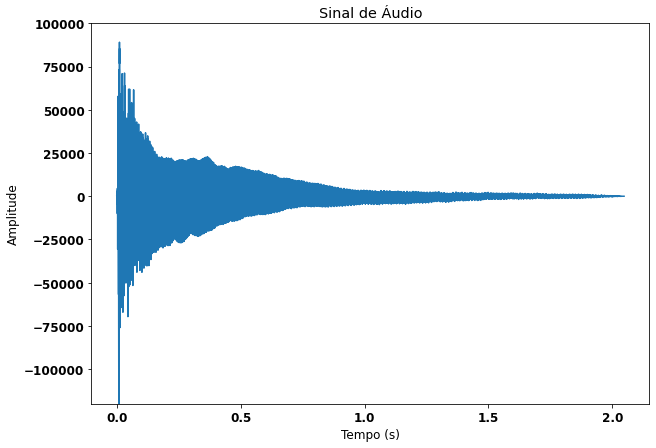

In [9]:
import numpy as np
import scipy.io.wavfile as wv 
import os
import matplotlib.pyplot as plt
import sounddevice as sd

soundFile = '../MATERIAL/HD_02_PYTHON/sound_01.wav'               # Especifica do local e nome do arquivo de áudio
dFa,vtSom = wv.read(soundFile)                                   # Abre arquivo de áudio de um arquivo
# vtSom: amplitude das amostras de som
# dFa: frequência de amostrasgem do som (amostragem no tempo)
vtSom = 4.0*vtSom
vtSomint16 = vtSom.astype('int16')                               #converte de float64 para int16 para reduzir ruído
wv.write('../MATERIAL/HD_02_PYTHON/4xsound_01.wav',dFa,vtSomint16)#salva amomstra de som para ser reproduzida
#reproduz a amostra de som salva
#os.system('cvlc --play-and-exit ../MATERIAL/HD_02_PYTHON/4x_sound_01.wav')           
dta = 1/dFa                                                      # Tempo entre amostras
dTFinal = (len(vtSom)-1)*dta                                     # Tempo da última amostra do sinal de áudio
vtTSom = np.arange(0,dTFinal+dta,dta)                            # Eixo temporal do arquivo de áudio
plt.figure(1,[10,7])
font = {'family' : 'DejaVu Sans','weight' : 'bold','size': 12}   #Configura a fonte do título
plt.rc('font', **font)
plt.plot(vtTSom,vtSom)                                           # Plota gráfico do áudio
plt.title('Sinal de Áudio')                                      # Configura título do gráfico
plt.ylabel('Amplitude')                                          # Configura eixo X do gráfico
plt.xlabel('Tempo (s)')                                          # Configura eixo Y do gráfico
plt.ylim([-120000,100000])                                       # Configura eixo Y do gráfico

sd.play(vtSom,dFa)                                               # Reproduz o audio

plt.show()

**OBS.:** Na linha de código:
```python
vtSomint16 = vtSom.astype('int16')    #converte de float64 para int16 para reduzir ruído
```
foi feito o que se chama de _casting_. Nada mais é que uma conversão entre tipos, e o método **astype** retorna uma cópia de seu array com o tipo alterado. Foi escolhido o 'int16' porque este não gerava tanta distorção na hora de gravar o arquivo. Vale salientar que os algoritmos de conversão do array para um arquivo **.wav** está fora do escopo da disciplina, e o tipo dos elementos do array influi tanto no ruído como no tamanho do vetor para armazenar o áudio (caso queiramos gravá-lo).


**Sugestão:** Relembre do comando para exportar arquivos .wav (áudio).
```python
wv.write('tom_corrente.wav',fa,y) #grava o tom para reprodução
```
O parâmetro 'fa' especifica a frequência de amostragem do sinal a ser escrito. 

**Passo 3:** Altere essa variável (dFa) e reproduza os áudios novos para observar os efeitos obtidos. Sugestão: tente as frequências de 60 kHz e 22050 Hz (metade). 

**Passo 4:** Agora vamos abrir uma música com dois canais e fazer algumas manipulações. Abra um script em branco, salve-o como **handson3_3.py** e incluia o seguinte código: 

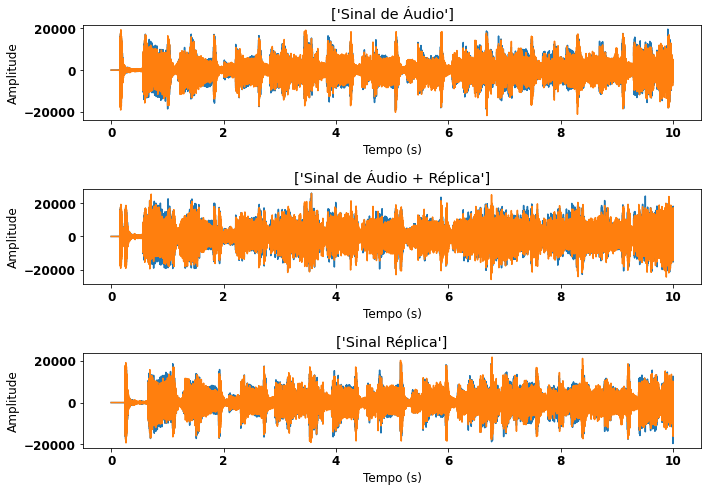

In [ ]:
import numpy as np
import scipy.io.wavfile as wv 
import os
import matplotlib.pyplot as plt
import sounddevice as sd

soundFile = '../MATERIAL/HD_02_PYTHON/sound_02.wav' # Especifica do local e nome do arquivo de áudio
dFa,vtSom = wv.read(soundFile)                     # Abre arquivo
tf = 10                                            # Tempo que deseja tocar o arquivo
amostrasTf = int(np.ceil(tf*dFa))                  # Número de amostras para o tempo especificado
vtSom = vtSom[0:amostrasTf,:]                      # Considera somente as amostras para o tempo especificado
dta = 1/dFa                                        # Tempo entre amostras
dTFinal = (len(vtSom)-1)*dta                       # Tempo da última amostra do sinal de áudio
vtTSom = np.arange(0,dTFinal+dta,dta)              # Eixo temporal do arquivo de áudio
plt.figure(1,[10,7])
plt.subplot(311)
plt.plot(vtTSom,vtSom)                             # Plota gráfico do áudio
plt.title(['Sinal de Áudio'])                      # Configura título do gráfico
plt.ylabel('Amplitude')                            # Configura eixo X do gráfico
plt.xlabel('Tempo (s)')                            # Configura eixo Y do gráfico


wv.write('../MATERIAL/HD_02_PYTHON/sem_eco.wav',dFa,vtSom)
os.system('cvlc --play-and-exit ../MATERIAL/HD_02_PYTHON/sem_eco.wav') 

## Modifica o arquivo incluindo eco (uma réplica atrasada do sinal oirginal)
n = 2000                                           # Atraso da réplica do sinal                                                          
eco = np.zeros([len(vtSom),2])
end=len(vtSom)
eco[n:,:] = vtSom[0:end-n,:] 
vtSomEco = np.zeros([len(eco),2])
vtSomEco += eco
vtSomEco += vtSom

wv.write('../MATERIAL/HD_02_PYTHON/com_eco.wav',dFa,vtSomEco.astype('int16'))
os.system('cvlc --play-and-exit ../MATERIAL/HD_02_PYTHON/com_eco.wav') 

plt.subplot(312)                                   # Segundo gráfico do subplot

sd.play(vtSom,dFa)                                  # Reproduz o audio original
sd.wait()                                           # Espera o fim da reprodução do audio para continuar a execução do código

plt.plot(vtTSom,vtSomEco)                          # Plota gráfico do áudio
plt.title(['Sinal de Áudio + Réplica'])            # Configura título do gráfico
plt.ylabel('Amplitude')                            # Configura eixo X do gráfico
plt.xlabel('Tempo (s)')    

sd.play(vtSomEco,dFa)                               # Reproduz o audio com eco
sd.wait()                                           # Espera o fim da reprodução do audio para continuar a execução do código

plt.subplot(3,1,3)                                 # Terceiro gráfico do subplot
plt.plot(vtTSom,vtSom-vtSomEco)                    # Plota gráfico do áudio
plt.title(['Sinal Réplica'])                       # Configura título do gráfico
plt.ylabel('Amplitude')                            # Configura eixo X do gráfico
plt.xlabel('Tempo (s)')                            # Configura eixo Y do gráfico

sd.play(vtSom-vtSomEco,dFa)                         # Reproduz apenas o eco

plt.tight_layout()
plt.show()

**Passo 4:** Escolha outros valores para a variável 'n' no código acima, que determina o ponto de partida do eco. Re-execute o código para ouvir os resultados.

**Exercício 02 (para o relatório):** Plote os gráficos acima escolhendo os limites horizontais (apenas o eixo x) para que fique mais evidente, na visualização, o ponto em que a réplica começa. Essa prática é análoga a dar um zoom no começo do sinal.

**Dica:** Para escolher os limites dos eixos, tanto x quanto y, use os comandos:
```python
plt.xlim([limite_esquerdo,limite_direito])
plt.ylim([limite_inferior,limite_superior])
```

# Bibliografia

B. P. Lathi, Modern Digital and Analog Communication Systems, The Oxford Series in Electrical and Computer Engineering, Mar 26, 1998.

B. P. Lathi, Linear Systems and Signals, 2nd Edition, Jul 1, 2004.

John G. Proakis, Dimitris G. Manolakis, Digital Signal Processing: Principles, Algorithms, and Applications, Prentice Hall, 1996.

Brasil Escola, Ondas (http://brasilescola.uol.com.br/fisica/ondas.htm)

Mundo da Educação, Ondas (http://mundoeducacao.bol.uol.com.br/fisica/ondas-2.htm)